## prework

* import basic dependencies
* get data -- keras.dataset imdb(IMDB电影评论情感分类数据集)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# hyper-parameters
maxlen = 20
max_features = 10000 
embedding_dim = 8

In [4]:
# get data -- imdb(movie review)
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

17465344/17464789 [==============================] - 0s 0us/step


((25000,), (25000,), (25000,), (25000,))

## data preprocessing

* hyper-parameters
    * max_length
    * embedding_dim
* build dict
    * word level 单词级别
    * characters level 字符级别
* one-hot encoding
* transform to model input data

In [5]:
import string

from keras.preprocessing.sequence import pad_sequences

In [6]:
# hyper-parameters
word_max_length = 10 # select top 10 in words-dict
character_max_length = 50 # select top 50 in characters-dict

In [7]:
# sample data
samples = ['The cat sat on the mat.', 'The dog ate my homework.', 'a panda is sleeping.']

In [8]:
# build dict -- word level
words_token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in words_token_index:
            words_token_index[word] = len(words_token_index) + 1

# visualize index dict
print(words_token_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10, 'a': 11, 'panda': 12, 'is': 13, 'sleeping.': 14}


In [9]:
results = np.zeros((len(samples), word_max_length, max(words_token_index.values())+1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:word_max_length]:
        index = words_token_index.get(word)
        results[i, j, index] = 1.

# visualize encoding output
print(results[2, 3]) # test word 'sleeping' => the last one

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
# build dict -- characters level
characters = string.printable
characters_token_index = dict(zip(characters, range(1, len(characters) + 1)))
print(characters_token_index)

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}


In [11]:
results = np.zeros((len(samples), character_max_length, max(characters_token_index.values())+1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:character_max_length]):
        index = characters_token_index.get(character)
        results[i, j, index] = 1.

# visualize encoding output
print(results[2, 0]) # test character 'a' => 12th(11 index)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


### then process IMDB dataset

* imdb parameters
    * maxlen
* pad_sequences

In [12]:
# pad_sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
x_train.shape, x_test.shape

((25000, 20), (25000, 20))

## Model

* load keras dependencies
* hyper-parameters
* build model
* compile, summary
* fit, predict, evaluate


In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.optimizers import RMSprop

In [14]:
# build model
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [15]:
# train hyper-parameters
# epochs = 10
epochs = 50

In [16]:
# fit
model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 1s 2ms/step - loss: 0.6656 - acc: 0.6273 - val_loss: 0.6084 - val_acc: 0.7038
Epoch 2/50
625/625 [==============================] - 1s 1ms/step - loss: 0.5319 - acc: 0.7559 - val_loss: 0.5188 - val_acc: 0.7334
Epoch 3/50
625/625 [==============================] - 1s 1ms/step - loss: 0.4573 - acc: 0.7886 - val_loss: 0.4993 - val_acc: 0.7458
Epoch 4/50
625/625 [==============================] - 1s 1ms/step - loss: 0.4211 - acc: 0.8059 - val_loss: 0.4897 - val_acc: 0.7542
Epoch 5/50
625/625 [==============================] - 1s 1ms/step - loss: 0.3970 - acc: 0.8216 - val_loss: 0.4900 - val_acc: 0.7598
Epoch 6/50
625/625 [==============================] - 1s 1ms/step - loss: 0.3775 - acc: 0.8342 - val_loss: 0.4924 - val_acc: 0.7596
Epoch 7/50
625/625 [==============================] - 1s 1ms/step - loss: 0.3597 - acc: 0.8415 - val_loss: 0.4963 - val_acc: 0.7592
Epoch 8/50
625/625 [==============================] - 1s 1ms/step - loss: 0.

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=True)
print('test_loss:', test_loss, '\ntest_acc:',test_acc)

782/782 [==============================] - 1s 805us/step - loss: 1.2437 - acc: 0.6850
test_loss: 1.2436516284942627 
test_acc: 0.6849600076675415


## SimpleRNN
短期信息

* import dependencies
* build model
* compile, fit
* evalute, plot

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [19]:
# build model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop' ,loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [20]:
# fit
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 1s 8ms/step - loss: 0.5866 - acc: 0.6735 - val_loss: 0.5368 - val_acc: 0.7266
Epoch 2/10
157/157 [==============================] - 1s 7ms/step - loss: 0.4313 - acc: 0.8004 - val_loss: 0.4922 - val_acc: 0.7548
Epoch 3/10
157/157 [==============================] - 1s 7ms/step - loss: 0.3502 - acc: 0.8485 - val_loss: 0.5338 - val_acc: 0.7394
Epoch 4/10
157/157 [==============================] - 1s 8ms/step - loss: 0.2710 - acc: 0.8903 - val_loss: 0.5793 - val_acc: 0.7344
Epoch 5/10
157/157 [==============================] - 1s 8ms/step - loss: 0.1906 - acc: 0.9279 - val_loss: 0.7002 - val_acc: 0.7196
Epoch 6/10
157/157 [==============================] - 1s 8ms/step - loss: 0.1202 - acc: 0.9582 - val_loss: 0.8152 - val_acc: 0.7074
Epoch 7/10
157/157 [==============================] - 1s 7ms/step - loss: 0.0718 - acc: 0.9768 - val_loss: 0.9318 - val_acc: 0.7066
Epoch 8/10
157/157 [==============================] - 1s 7ms/step - loss: 0.

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Train accuracy: ', acc)
print('Train loss:', loss)
print('Validation accuracy: ', val_acc)
print('Validation loss: ', val_loss)

Train accuracy:  [0.6735000014305115, 0.80035001039505, 0.8484500050544739, 0.890250027179718, 0.9278500080108643, 0.9582499861717224, 0.9768499732017517, 0.9888499975204468, 0.9947999715805054, 0.9973499774932861]
Train loss: [0.5866233706474304, 0.43133997917175293, 0.3501887917518616, 0.27102696895599365, 0.1905575841665268, 0.12015842646360397, 0.07181470096111298, 0.04017270356416702, 0.020589912310242653, 0.011756732128560543]
Validation accuracy:  [0.7265999913215637, 0.754800021648407, 0.7394000291824341, 0.7343999743461609, 0.7196000218391418, 0.7074000239372253, 0.70660001039505, 0.6887999773025513, 0.699999988079071, 0.675000011920929]
Validation loss:  [0.5368485450744629, 0.49215981364250183, 0.5337677001953125, 0.5793411731719971, 0.7002029418945312, 0.8152105808258057, 0.931757926940918, 1.0465610027313232, 1.2167528867721558, 1.3737224340438843]


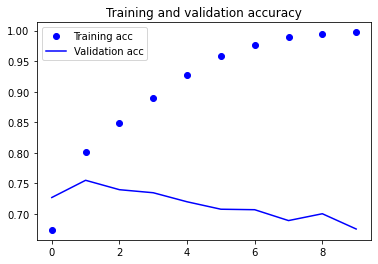

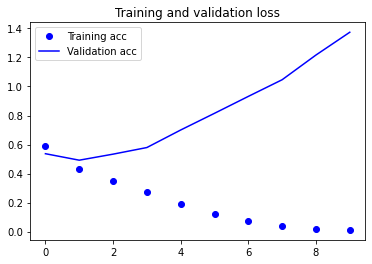

In [22]:
# plot
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM unit

* hyper-parameters
* import dependencies
* build model 
* compile, summary
* fit, evalute, plot

In [23]:
from keras.layers import LSTM

In [24]:
# hyper-parameters
max_features = 10000
maxlen = 500
batch_size = 32

# load data
# 前面已经加载过，同时是按照相同的超参数进行加载的。

In [25]:
# build model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fit
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 3s 17ms/step - loss: 0.5847 - acc: 0.6880 - val_loss: 0.5202 - val_acc: 0.7374
Epoch 2/10
157/157 [==============================] - 2s 15ms/step - loss: 0.4447 - acc: 0.7902 - val_loss: 0.5123 - val_acc: 0.7494
Epoch 3/10
157/157 [==============================] - 2s 15ms/step - loss: 0.3968 - acc: 0.8214 - val_loss: 0.4903 - val_acc: 0.7492
Epoch 4/10
157/157 [==============================] - 2s 14ms/step - loss: 0.3700 - acc: 0.8374 - val_loss: 0.5150 - val_acc: 0.7418
Epoch 5/10
157/157 [==============================] - 2s 14ms/step - loss: 0.3521 - acc: 0.8457 - val_loss: 0.5092 - val_acc: 0.7488
Epoch 6/10
157/157 [==============================] - 2s 14ms/step - loss: 0.3366 - acc: 0.8565 - val_loss: 0.5248 - val_acc: 0.7486
Epoch 7/10
157/157 [==============================] - 2s 14ms/step - loss: 0.3234 - acc: 0.8611 - val_loss: 0.5417 - val_acc: 0.7464
Epoch 8/10
157/157 [==============================] - 2s 15ms/step - 

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Train accuracy: ', acc)
print('Train loss:', loss)
print('Validation accuracy: ', val_acc)
print('Validation loss: ', val_loss)

Train accuracy:  [0.6880499720573425, 0.7901999950408936, 0.8214499950408936, 0.8373500108718872, 0.8456500172615051, 0.8565000295639038, 0.8611000180244446, 0.8687999844551086, 0.8755499720573425, 0.8824499845504761]
Train loss: [0.5847411155700684, 0.4446776509284973, 0.39679625630378723, 0.3700365126132965, 0.3520793914794922, 0.33655211329460144, 0.32337117195129395, 0.3100030720233917, 0.2958836555480957, 0.281078964471817]
Validation accuracy:  [0.7373999953269958, 0.7494000196456909, 0.7491999864578247, 0.7418000102043152, 0.7487999796867371, 0.7486000061035156, 0.746399998664856, 0.7472000122070312, 0.7394000291824341, 0.7400000095367432]
Validation loss:  [0.5201529860496521, 0.5122795701026917, 0.4903121590614319, 0.5150447487831116, 0.5092180967330933, 0.5247985124588013, 0.5417156219482422, 0.5327207446098328, 0.6243939995765686, 0.6088996529579163]


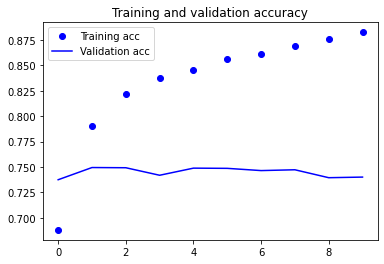

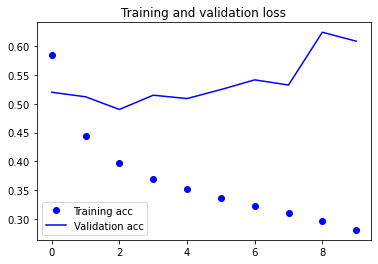

In [28]:
# plot
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Adavnaced model (Add LSTM unit)

* add lstm unit
* build model
* compile, summary
* fit, evalute

In [29]:
from keras.layers import LSTM, Dropout
from keras.optimizers import Adam

In [30]:
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5, return_sequences=False))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 8)            80000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 128)          70144     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 206,153
Trainable params: 206,153
Non-trainable params: 0
________________________________________________

In [31]:
# fit
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 31s 50ms/step - loss: 5.9789e-08 - accuracy: 0.5015 - val_loss: 5.8866e-08 - val_accuracy: 0.5058
Epoch 2/20
625/625 [==============================] - 31s 49ms/step - loss: 5.9789e-08 - accuracy: 0.5025 - val_loss: 5.8866e-08 - val_accuracy: 0.5058
Epoch 3/20
625/625 [==============================] - 31s 50ms/step - loss: 5.9789e-08 - accuracy: 0.4938 - val_loss: 5.8866e-08 - val_accuracy: 0.5058
Epoch 4/20
625/625 [==============================] - 31s 49ms/step - loss: 5.9789e-08 - accuracy: 0.5016 - val_loss: 5.8866e-08 - val_accuracy: 0.5058
Epoch 5/20
625/625 [==============================] - 31s 50ms/step - loss: 5.9789e-08 - accuracy: 0.4998 - val_loss: 5.8866e-08 - val_accuracy: 0.5058
Epoch 6/20
625/625 [==============================] - 31s 49ms/step - loss: 5.9789e-08 - accuracy: 0.4974 - val_loss: 5.8866e-08 - val_accuracy: 0.5058
Epoch 7/20
625/625 [==============================] - 31s 50ms/step - loss: 5.9789e-08 -

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=True)
print('test_loss:', test_loss, '\ntest_acc:',test_acc)

782/782 [==============================] - 6s 8ms/step - loss: 5.9605e-08 - accuracy: 0.5044
test_loss: 5.960464477539063e-08 
test_acc: 0.5044000148773193
